# Name: Nader Mohamed Elhadedy

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
x = pd.read_table("auto-mpg.names")

In [ ]:
x

,1. Title: Auto-Mpg Data
0,2. Sources:
1,(a) Origin: This dataset was taken from th...
2,maintained at Carnegie Mellon ...
3,used in the 1983 American Stat...
4,"(c) Date: July 7, 1993"
5,3. Past Usage:
6,- See 2b (above)
7,"- Quinlan,R. (1993). Combining Instance-B..."
8,In Proceedings on the Tenth Internation...
9,"Learning, 236-243, University of Massac..."


In [ ]:
cols = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model year", "origin", "car name"]

In [ ]:
df = pd.read_csv("auto-mpg.data", header=None, delim_whitespace=True, names=cols)

In [ ]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [ ]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [ ]:
df.horsepower.unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [ ]:
df.groupby("horsepower").size()

horsepower
100.0    17
102.0     1
103.0     1
105.0    12
107.0     1
         ..
95.00    14
96.00     3
97.00     9
98.00     2
?         6
Length: 94, dtype: int64

In [ ]:
df.horsepower.replace("?", np.NaN, inplace=True,)
df.horsepower = df['horsepower'].astype('float64', errors='ignore')

In [ ]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [ ]:
df.shape

(398, 9)

In [ ]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [ ]:
df.horsepower.replace(np.NaN, df.horsepower.median(), inplace=True)

In [ ]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(398, 9)

In [ ]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.304020,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.222625,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


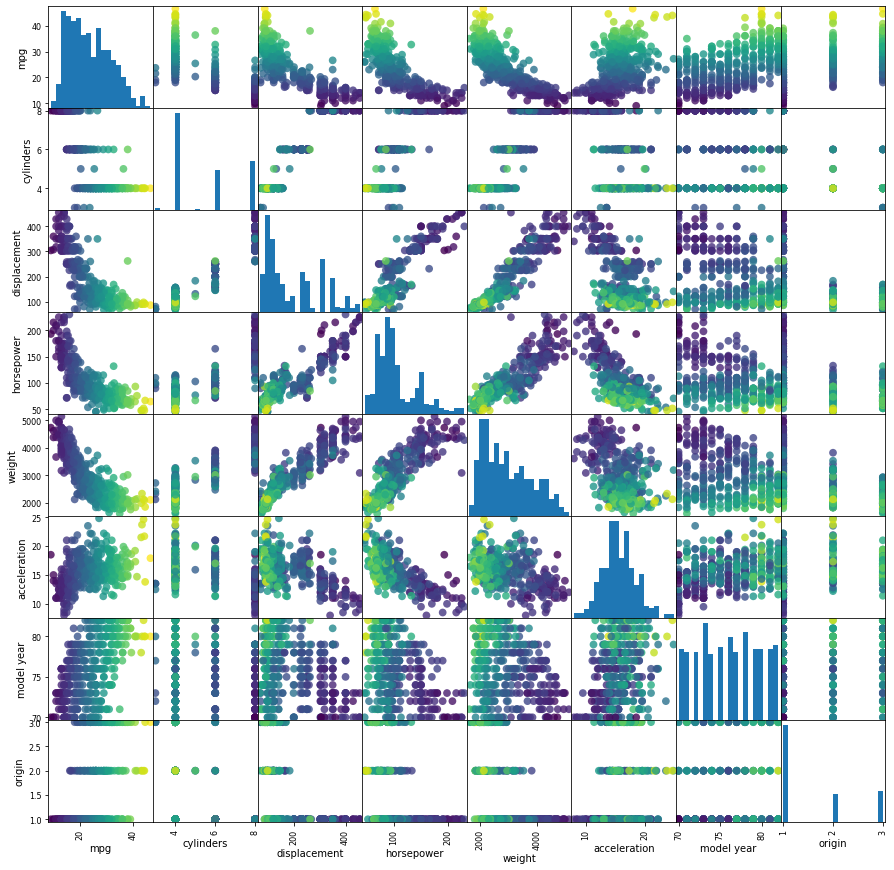

In [ ]:
pd.plotting.scatter_matrix(df, figsize=(15,15),marker='o',hist_kwds={'bins':20},s=60,alpha=.8,c=df['mpg'])
plt.show()

In [ ]:
df.corrwith(df.mpg)

mpg             1.000000
cylinders      -0.775396
displacement   -0.804203
horsepower     -0.773453
weight         -0.831741
acceleration    0.420289
model year      0.579267
origin          0.563450
dtype: float64

The best four correlated features are **displacement**, **weight**, **horsepower** and **cylinders**. (-ve)

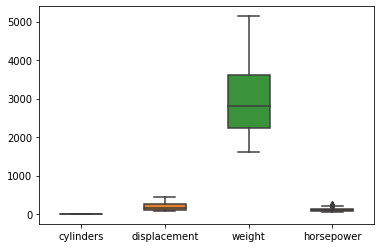

In [ ]:
sns.boxplot(data=df[['cylinders', 'displacement', 'weight', 'horsepower']], width=0.5)
plt.show()

In [ ]:
from sklearn import preprocessing
# normalize data to better plot only
columns = ['cylinders', 'displacement', 'weight', 'horsepower']
x = df[columns].values
min_max_scaler = preprocessing.MinMaxScaler()
x = min_max_scaler.fit_transform(x)
x = pd.DataFrame(x)
x.columns = columns

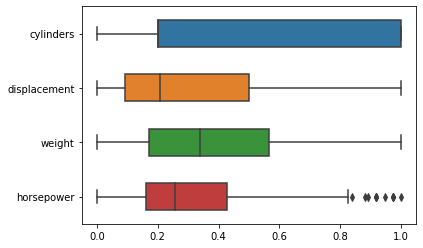

In [ ]:
sns.boxplot(data=x, width=0.5, orient='h')
plt.show()

In [ ]:
df.horsepower.describe()

count    398.000000
mean     104.304020
std       38.222625
min       46.000000
25%       76.000000
50%       93.500000
75%      125.000000
max      230.000000
Name: horsepower, dtype: float64

There is no compelling reason to remove outliers in **horsepower** column as it's very convergent to the third quantile and there are **no outliers** in the remaining targeted features.

In [ ]:
def get_regression_result(feature, target):
  """A function that plots actual vs predicted data and prints the test score"""

  #Create Training and Test Sets and Apply Scaling
  from sklearn.model_selection import train_test_split
  X_train, X_test, y_train, y_test = train_test_split(feature, target, random_state=0)

  X_train = X_train.to_numpy().reshape((-1,1))
  X_test = X_test.to_numpy().reshape((-1,1))

  from sklearn.linear_model import LinearRegression
  regressor = LinearRegression()
  regressor.fit(X_train, y_train)

  # predict test values
  y_pred = regressor.predict(X_test)

  # plot actual vs predicted data
  plt.scatter(X_test, y_test, color = 'purple', label='Actual Data')
  plt.plot(X_test, y_pred, color = 'red', label='Regression Line')
  plt.title('Actual vs Predicted')
  plt.grid()
  plt.xlabel('X')
  plt.ylabel('Y')
  plt.legend()
  plt.show()

  r_sq = regressor.score(feature.to_numpy().reshape((-1,1)), target.to_numpy().reshape((-1,1)))

  print("Test Score:", r_sq)

**Feature1: cylinders**

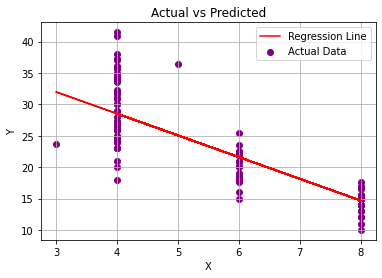

Test Score: 0.600714670654276


In [ ]:
get_regression_result(df.cylinders, df.mpg)

**Feature2: displacement**

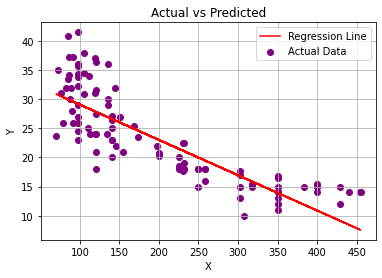

Test Score: 0.6465383813407108


In [ ]:
get_regression_result(df.displacement, df.mpg)

**Feature3: weight**

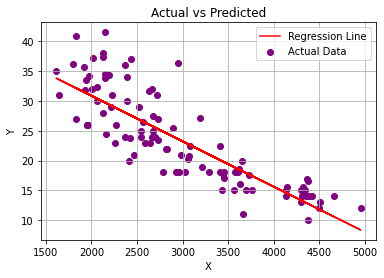

Test Score: 0.6917129944467789


In [ ]:
get_regression_result(df.weight, df.mpg)

**Feature4: horsepower**

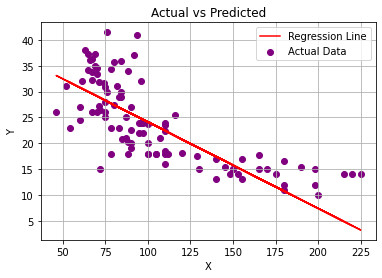

Test Score: 0.5961151091857986


In [ ]:
get_regression_result(df.horsepower, df.mpg)

**Test scores** met the expectations we got from the **correlations** as the highest score came from the highest correlation of a feature with the dependant variable.

<hr>

In [ ]:
def get_average_score(feature, target):
  """A function that gets 5 random splits and prints the average test score for them"""

  sizes = np.linspace(0.1,0.5,5)
  scores = []
  from sklearn.model_selection import train_test_split
  for j in sizes:
    X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=j, random_state=0)
    X_train = X_train.to_numpy().reshape((-1,1))
    X_test = X_test.to_numpy().reshape((-1,1))

    from sklearn.linear_model import LinearRegression
    regressor = LinearRegression().fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    score = regressor.score(feature.to_numpy().reshape((-1,1)), target.to_numpy().reshape((-1,1)))
    scores.append(score)

  return f"Average Score: {np.mean(scores)}"

In [ ]:
get_average_score(df.weight, df.mpg)

'Average Score: 0.6912060630366083'

In [ ]:
get_average_score(df.displacement, df.mpg)

'Average Score: 0.6461171041682248'

In [ ]:
get_average_score(df.cylinders, df.mpg)

'Average Score: 0.600016313320982'

In [ ]:
get_average_score(df.horsepower, df.mpg)

'Average Score: 0.5968499542891434'

**Average scores** are very close to the **scores** above.

<hr>

**Gradient Descent Implementation**

In [ ]:
def ssr_gradient(x, y, b):
  res = b[0] + b[1] * x - y
  return res.mean(), (res * x).mean()

In [ ]:
def gradient_descent(gradient, x, y, start, learn_rate=0.1, n_iter=50, tolerance=1e-06):
  vector = start
  for _ in range(n_iter):
    diff = -learn_rate * np.array(gradient(x, y, vector))
    if np.all(np.abs(diff) <= tolerance):
      break
    vector += diff
  return vector

In [ ]:
def R2_score(y_actual, y_pred):
    SStot = np.sum((y_actual - np.mean(y_actual))**2)
    SSres = np.sum((y_actual - y_pred)**2)
    R2 = 1 - (SSres / SStot)
    return R2

In [ ]:
trial = gradient_descent(ssr_gradient, df.cylinders, df.mpg, [0,0], 0.05, 1000)

In [ ]:
y_pred = trial[0] + trial[1] * df.cylinders

In [ ]:
R2 = R2_score(df.mpg, y_pred)

In [ ]:
R2

0.6007694975079987

**Adjusted R-squared**

Similar to R-squared, the Adjusted R-squared measures the variation in the dependent variable (or target), explained by only the **features** which are **helpful** in making predictions. Unlike R-squared, the Adjusted R-squared would penalize you for adding features which are not useful for predicting the target.

In other words, **Adjusted R-squared** is a modified version of R-squared, adds precision and reliability by considering the **impact of additional independent variables** that tend to skew the results of R-squared measurements.
The predicted R-squared, unlike the adjusted R-squared, is used to indicate how well a regression model predicts responses for new observations.

In [ ]:
M = 1 # number of columns (simple regression)
N = len(df.mpg) # number of rows

In [ ]:
R2_adj = 1-(1-R2)*((N-1) / (N-M-1))

In [ ]:
R2_adj

0.5997613396734229

<hr>